In [1]:
import numpy as np
import healpy as hp
import pandas as pd
from pylab import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase


for k in range(3):
    f = '../Data_exc_lqg_s2/sample2_excluding_LQG.csv' 
    df0 = pd.read_csv(f)

    fd1 = df0[(df0.b>=40)]
    fd2 = df0[(df0.b<=0)]
    fd3 = fd2[(fd2.b<=-60)]

    fd4 = pd.concat([fd1, fd3])
    fd4.reset_index(inplace = True, drop = True)
    
    l = fd4['l'].to_numpy()
    b = fd4['b'].to_numpy()

    l_rad = np.radians(l)
    b_rad = np.radians(b)

    # angular distance from (l=0, b=0)
    cos_theta = np.cos(b_rad) * np.cos(l_rad)
    theta_rad = np.arccos(cos_theta)
    theta_deg = np.degrees(theta_rad)

    # Apply circular mask of radius 68.6°
    mask = theta_deg > 68.6
    fd5 = fd4[mask].reset_index(drop=True)
    
    r = fd5['r'].to_numpy()    
    th = fd5['theta'].to_numpy()
    ph = fd5['phi'].to_numpy()

    Nside= 64                 
    Npix=hp.nside2npix(Nside)

   
    m=np.zeros(Npix, dtype= int)
    for i in range(len(r)):
        px=hp.ang2pix(Nside, th[i], ph[i])
        m [px]+=1

    P=[]
    for j in range(Npix):
        if(m[j]>0):
            P.append(j)
    p = np.array(P)
    df1 = pd.DataFrame(data=p)
    f1 = '../Data_exc_lqg_s2/m4_non_zero_pix_id_s2_ex_LQG.dat'

    df1.to_csv(f1,sep='\t',header = None,index = False)
            
    op = '../Data_exc_lqg_s2/m4_sample2_ex_LQG.dat'
    fd5 = fd5.drop(columns=['l', 'b', 'redshift'])
    fd5.to_csv(op,sep = '\t',header = None,index = False)



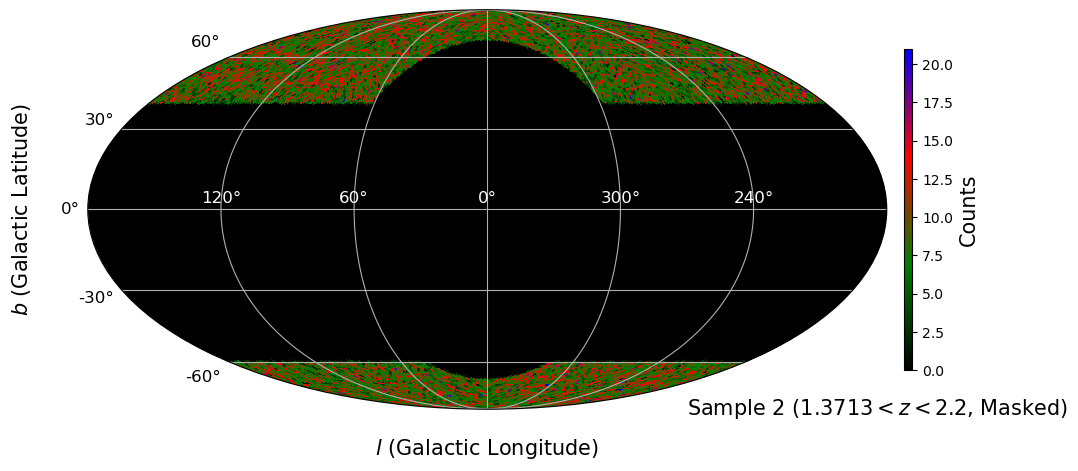

In [2]:
#################################################################################################

# Visualization of the masked data

df_ = pd.read_csv("../Data_exc_lqg_s2/m4_sample2_ex_LQG.dat",sep="\t",header = None)
df_.columns = ['r','th','ph']
th2 = df_['th'].to_numpy()
ph2 = df_['ph'].to_numpy()

m1 = np.zeros(Npix)
for j in range(len(th2)):
    px1=hp.ang2pix(Nside,th2[j],ph2[j])
    
    m1[px1] += 1
    
m1min, m1max = np.min(m1),np.max(m1)

custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom",["black","green","red","blue"])
hp.projview(m1, coord=["G"], cbar=False, cmap=custom_cmap, graticule=True,
            graticule_labels=True, projection_type="mollweide", 
            longitude_grid_spacing=60, latitude_grid_spacing=30, xtick_label_color='white', 
            ytick_label_color='black', graticule_color=None)

plt.xlabel(r"$l$ (Galactic Longitude)", fontsize=15, labelpad=20)  
plt.ylabel(r"$b$ (Galactic Latitude)", fontsize=15, labelpad=20) 
plt.text(0.75, 0.00, r"Sample 2 ($1.3713 < z < 2.2$, Masked)", fontsize=15, color='black',
          ha='left', va='center', transform=plt.gca().transAxes)
norm = Normalize(vmin=np.min(m1), vmax=np.max(m1))
cax = plt.axes([1.0, 0.2, 0.01, 0.6])  
color_bar = ColorbarBase(cax, cmap=custom_cmap, norm=norm, orientation='vertical')
color_bar.set_label('Counts', fontsize=15)


#plt.savefig('mollview_sample_2_ex_LQG.pdf', dpi=200, bbox_inches='tight')
plt.show()